In [5]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# 定义线性回归类
class LinearRegression():
    # 定义预测函数
    def predict(self, x):
        # 根据当前的模型参数进行预测
        y = x.dot(self.w) + self.b  # 参见方程 Eq.(2.3)
        return y

    # 定义损失函数
    def loss_function(self, train_x, train_y):
        # 数据量大小
        inst_num = train_x.shape[0]
        # 根据模型进行预测
        pred_y = train_x.dot(self.w) + self.b  # 训练预测
        # 计算均方误差损失
        loss = np.sum((pred_y - train_y) ** 2) / (2 * inst_num)  # 参见方程 Eq.(2.4)
        return loss

    # 定义计算梯度的函数
    def calculate_grad(self, train_x, train_y):
        # 数据量大小
        inst_num = train_x.shape[0]
        # 根据模型进行预测
        pred_y = train_x.dot(self.w) + self.b  # 训练预测
        # 计算权重的梯度
        grad_w = (train_x.T).dot((pred_y - train_y)) / inst_num  # 参见方程 Eq.(2.5)
        # 计算偏置的梯度
        grad_b = np.sum((pred_y - train_y)) / inst_num  # 参见方程 Eq.(2.6)
        return grad_w, grad_b

    # 梯度下降算法
    def gradient_descent(self, train_x, train_y, learn_rate, max_iter, epsilon):
        # 初始化损失列表，用于记录每次迭代的损失
        loss_list = []
        for i in range(max_iter):
            # 计算当前参数下的损失
            loss_old = self.loss_function(train_x, train_y)
            loss_list.append(loss_old)
            # 计算梯度
            grad_w, grad_b = self.calculate_grad(train_x, train_y)
            # 更新模型参数
            self.w = self.w - learn_rate * grad_w
            self.b = self.b - learn_rate * grad_b
            # 计算更新后的损失
            loss_new = self.loss_function(train_x, train_y)
            # 如果新旧损失之间的差异小于epsilon，则停止迭代
            if abs(loss_new - loss_old) <= epsilon:
                break
        return loss_list

    # 学习线性回归模型
    def fit(self, train_x, train_y, learn_rate, max_iter, epsilon):
        # 特征维度
        feat_num = train_x.shape[1]
        # 初始化模型参数
        self.w = np.zeros((feat_num, 1))
        self.b = 0.0
        # 使用梯度下降算法学习模型参数
        loss_list = self.gradient_descent(train_x, train_y, learn_rate, max_iter, epsilon)
        # 可视化训练过程
        self.training_visualization(loss_list)

    # 训练过程可视化
    def training_visualization(self, loss_list):
        # 绘制损失随迭代次数变化的图
        plt.plot(loss_list, color='red')
        plt.xlabel("iterations")
        plt.ylabel("loss")
        plt.savefig("loss.png", bbox_inches='tight', dpi=400)
        plt.show()


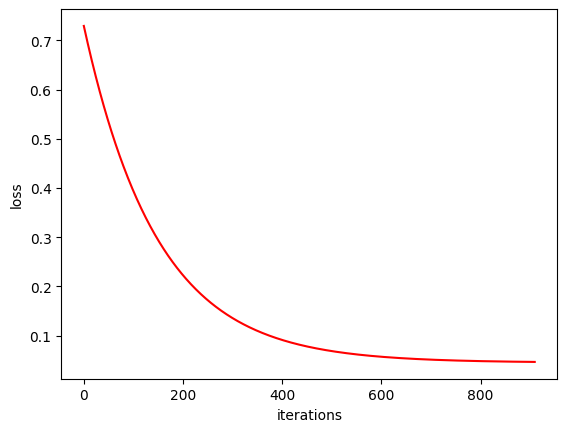

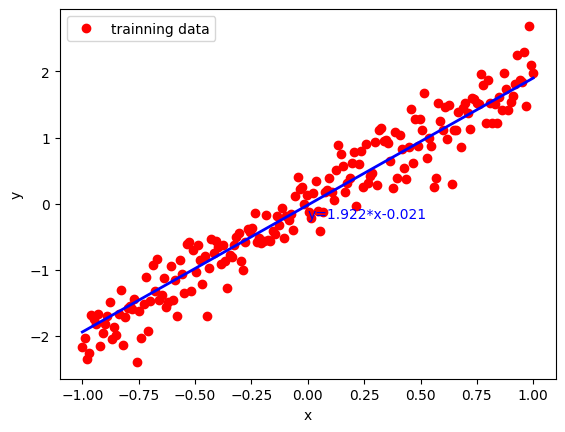

In [6]:
X = np.linspace(-1, 1, 200)
Y = 2*X+np.random.randn(200)*0.3
train_x = X.reshape(-1,1)
train_y = Y.reshape(-1,1)
LR = LinearRegression()
LR.fit(train_x, train_y, 0.01, 1000, 0.00001)
plt.plot(X,Y,'ro',label="trainning data")
plt.legend()
plt.plot(X,LR.w[0,0]*X+LR.b,ls="-",lw=2,c="b")
plt.xlabel("x")
plt.ylabel("y")
s="y=%.3f*x%.3f"%(LR.w[0,0],LR.b)
plt.text(0,LR.b-0.2,s,color="b")
plt.savefig("result.png", bbox_inches = 'tight',dpi=400)
plt.show()

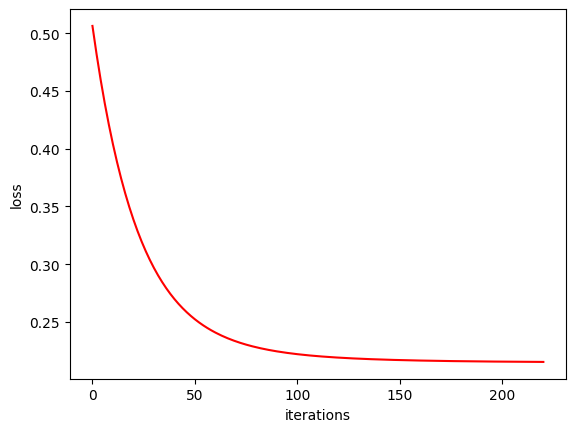

LR_model RMSE:0.663


In [7]:
# import necessary libs
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as LR_SKL
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
LR=LinearRegression
# load experiment data
data = pd.read_csv('Client_Value.csv',encoding='GBK')
# data normalization
scaler = StandardScaler()
data = scaler.fit_transform(data)
# divide data into train/test, 70% for train, 30% for test
X_train, X_test, Y_train, Y_test = train_test_split(data[:, 1:],
                                                    data[:, 0],
                                                    test_size=0.3,
                                                    shuffle=True)
X_train = X_train.reshape(-1, 5)
Y_train = Y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 5)
Y_test = Y_test.reshape(-1, 1)
# set training parameters and define eval metric
learnrate = 0.01
maxiter = 1000
eps = 1e-5


def cal_rmse(y_test, y_pred):
    loss = np.sum((y_pred - y_test) ** 2) / (len(y_test))
    return np.sqrt(loss)


# build prediction model using LR
LR_model = LR()
LR_model.fit(train_x=X_train, train_y=Y_train,
             learn_rate=learnrate, max_iter=maxiter, epsilon=eps)
Y_test_pred_LR = LR_model.predict(X_test)
rmse = cal_rmse(Y_test, Y_test_pred_LR)
print("LR_model RMSE:%.3f" % (rmse))

In [8]:
# build prediction model using LR_SKL
LR_SKL_model = LR_SKL()
LR_SKL_model.fit(X_train, Y_train)
Y_test_pred_LR_SKL = LR_SKL_model.predict(X_test)
rmse = cal_rmse(Y_test, Y_test_pred_LR_SKL)
print("LR_SKL_model RMSE:%.3f" % (rmse))

LR_SKL_model RMSE:0.666


# 代码细节解释

In [6]:
import numpy as np

# 向量点积
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
dot_product = np.dot(a, b)  # 计算向量a和b的点积

# 矩阵乘法
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
matrix_product = np.dot(A, B)  # 计算矩阵A和B的乘积
print(A,"\n",B)

[[1 2]
 [3 4]] 
 [[5 6]
 [7 8]]


In [4]:
dot_product

32

In [7]:
matrix_product

array([[19, 22],
       [43, 50]])


### 1. 导入必要的库
```python
import numpy as np
import matplotlib.pyplot as plt
```
- `numpy` 用于数学和矩阵运算。
- `matplotlib.pyplot` 用于绘图，这里主要用于展示损失函数的变化。

### 2. 定义`LinearRegression`类
这是一个线性回归模型的类定义。

### 3. 预测函数
```python
def predict(self, x):
    y = x.dot(self.w) + self.b
    return y
```
- `predict` 函数接收输入特征向量`x`，通过模型参数（权重`w`和偏置`b`）计算并返回预测值`y`。

### 4. 损失函数
```python
def loss_function(self, train_x, train_y):
    ...
    loss = np.sum((pred_y - train_y) ** 2) / (2 * inst_num)
    return loss
```
- `loss_function` 计算并返回当前模型参数下的均方误差损失。这是监督学习中常用的损失函数，用于衡量模型预测值与真实值之间的差异。

### 5. 计算梯度
```python
def calculate_grad(self, train_x, train_y):
    ...
    return grad_w, grad_b
```
- `calculate_grad` 根据当前模型参数、训练数据和真实标签计算梯度。这些梯度用于更新模型参数以减少损失。

### 6. 梯度下降算法
```python
def gradient_descent(self, train_x, train_y, learn_rate, max_iter, epsilon):
    ...
    return loss_list
```
- `gradient_descent` 是模型的主要学习算法，通过迭代地更新权重和偏置来最小化损失函数。学习率(`learn_rate`)、最大迭代次数(`max_iter`)和容忍误差(`epsilon`)是算法的控制参数。

### 7. 拟合模型
```python
def fit(self, train_x, train_y, learn_rate, max_iter, epsilon):
    ...
    self.training_visualization(loss_list)
```
- `fit` 函数初始化模型参数，并调用梯度下降算法来学习模型参数。最后，调用`training_visualization`来绘制训练过程中的损失下降图。

### 8. 训练过程可视化
```python
def training_visualization(self, loss_list):
    ...
    plt.show()
```
- `training_visualization` 函数绘制了每次迭代后损失函数值的变化，帮助我们直观地看到模型学习的过程和效果。
